Prepare the environment. 

In [1]:
! pip install nibabel h5py nilearn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
! wget -P /project/4180000.34/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_R_mapping.csv
! wget -P /project/4180000.34/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_labels.mnc
! wget -P /project/4180000.34/template http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_mask.mnc

--2022-09-16 09:55:40--  http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_R_mapping.csv
Resolving repo.mouseimaging.ca (repo.mouseimaging.ca)... 192.75.158.41
Connecting to repo.mouseimaging.ca (repo.mouseimaging.ca)|192.75.158.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13600 (13K) [text/csv]
Saving to: ‘/project/4180000.34/template/DSURQE_40micron_R_mapping.csv.1’

100%[======================================>] 13,600      --.-K/s   in 0s      

2022-09-16 09:55:40 (247 MB/s) - ‘/project/4180000.34/template/DSURQE_40micron_R_mapping.csv.1’ saved [13600/13600]

--2022-09-16 09:55:41--  http://repo.mouseimaging.ca/repo/DSURQE_40micron/DSURQE_40micron_labels.mnc
Resolving repo.mouseimaging.ca (repo.mouseimaging.ca)... 192.75.158.41
Connecting to repo.mouseimaging.ca (repo.mouseimaging.ca)|192.75.158.41|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72596577 (69M)
Saving to: ‘/project/4180000.34/template/DSURQE_40mi

In [3]:
from pandas import read_csv
df=read_csv('/project/4180000.34/scans.csv')

In [12]:
df.head()

,Unnamed: 0,Mouse_ID,POND_Mouse_ID,Study_Name,Is_Wildtype,TwoLevel_Group,Mouse_Sex,Timepoint,Mouse_Age,Mouse_Weight,...,Scan_To_Global_Relative_Jacobians,Scan_To_Study_Global_Space_Resampled_Absolute_Jacobians,Scan_To_Study_Global_Space_Resampled_Relative_Jacobians,Rigid_Transform,Rigid_Filepath,Scan_To_Study_Transform,Labels,QC_Date,QC_Score,QC_Image
0,1,TT_15q_717,1,15q,WT,15q,M,1.0,P70-77,NaN,...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/maget/scanbas...,NaN,NaN,NaN
1,2,TT_15q_718,2,15q,MUT,15q,M,1.0,P70-77,NaN,...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/maget/scanbas...,NaN,NaN,NaN
2,3,TT_15q_719,3,15q,WT,15q,M,1.0,P70-77,NaN,...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/maget/scanbas...,NaN,NaN,NaN
3,4,TT_15q_720,4,15q,MUT,15q,M,1.0,P70-77,NaN,...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/maget/scanbas...,NaN,NaN,NaN
4,5,TT_15q_722,5,15q,WT,15q,M,1.0,P70-77,NaN,...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/scanbase_firs...,/projects/scanbase/pipeline-40um/maget/scanbas...,NaN,NaN,NaN


In [18]:
df['Study_Name'].unique()

array(['15q', '15q_wMat', '16p11', '22q11', 'AndR', 'Arhgef6', 'Arid1b',
       'BALBC', 'BTBR', 'Chd8_Basson', 'Chd8_Nord', 'CNTNAP2', 'Dpyd',
       'Dvl1', 'En2', 'FMR1', 'FMR1_FVB', 'FOXP1', 'Gtf2i', 'Hgsnat',
       'ITGB3', 'Magel2', 'MAR', 'Mecp2_p60', 'NF1', 'Nhs', 'NL1', 'NL3',
       'NRXN1a', 'Raly', 'SERT_KI', 'SERT_KI_129', 'SERT_KO', 'SGSH',
       'SHANK3', 'TSC1', 'Turner', 'Ube3a', 'CHD7_Het', 'CHD7_En1Cre',
       'Cacnb2', 'Scn1a', '16p11_Golzio', 'Kctd13_Golzio', 'Chd8_Kim',
       'Kctd13', 'Ube3a_Dup', 'Taok2', '16p11_Zsu', 'Nphp1', 'Lat',
       'Setd5', 'Cul3', 'tcdd', 'mvpXkctd13', 'latXkctd13', 'Tbr1', 'VPA',
       'Syngap1', 'CMMR_New', 'GSK3', 'Itsn', 'Mthfr'], dtype=object)

In [19]:
df.to_csv('asset/study.csv')


In [1]:
import os
import numpy as np
from pandas import read_csv
from nilearn.input_data import NiftiLabelsMasker


data_dir='/project/4180000.34/'
mask_file=os.path.join(data_dir, 'template/DSURQE_40micron_mask.mnc')
label_file=os.path.join(data_dir, 'template/DSURQE_40micron_labels.mnc')
roi_file=os.path.join(data_dir,'template/DSURQE_40micron_R_mapping.csv')
scratch_folder='/scratch/data/joagra'

# quick function to check which vector element correspond to which in ROI extract. Here I extract the label file itselt
masker = NiftiLabelsMasker(labels_img=label_file, mask_img=mask_file, standardize=False, memory=scratch_folder, verbose=0)
label_extract = masker.fit_transform(label_file)
np.savetxt('asset/label_extract',label_extract)

df = read_csv('asset/study.csv')

#df = read_csv('asset/study_stable.csv')
new_affine = np.load('asset/affine.npy')


In [3]:
 # import the relevant libraries
import os
import numpy as np
import nibabel as nib
from nilearn.image import resample_to_img, math_img, resample_img, swap_img_hemispheres
from nilearn.input_data import NiftiLabelsMasker

#resample the mask to the same format as the images.
mask_rs = resample_img(mask_file, new_affine, target_shape=(97, 191, 63),interpolation='nearest') 
        
# convert to nifti bc MINC is terrible to handle IMO and save
mask_nifti = nib.Nifti1Image(mask_rs.get_data(), affine=mask_rs.affine)
nib.save(mask_nifti,os.path.join(data_dir,'template','mask_rs.nii.gz'))


In [23]:
# make some directories
! mkdir -p {data_dir}/tmp
#absolute jacobian output
! mkdir -p {data_dir}/proc/absolute/vol_AI
! mkdir -p {data_dir}/proc/absolute/roi_orig
! mkdir -p {data_dir}/proc/absolute/roi_flip
! mkdir -p {data_dir}/proc/absolute/roi_AI
#relative jacobian output
! mkdir -p {data_dir}/proc/relative/vol_AI
! mkdir -p {data_dir}/proc/relative/roi_orig
! mkdir -p {data_dir}/proc/relative/roi_flip
! mkdir -p {data_dir}/proc/relative/roi_AI
#cache directory
! mkdir -p {scratch_folder}

In [3]:
# import the relevant libraries
import os
import numpy as np
import nibabel as nib
from nilearn.image import resample_to_img, math_img, resample_img, swap_img_hemispheres
from nilearn.input_data import NiftiLabelsMasker


# init ROI mask
masker = NiftiLabelsMasker(labels_img=label_file, mask_img=mask_file, standardize=False, memory=scratch_folder, verbose=0)

for mouseID, absolute, relative in zip(df['Mouse_ID'], df['Scan_To_Study_Global_Space_Resampled_Absolute_Jacobians'],df['Scan_To_Study_Global_Space_Resampled_Relative_Jacobians']):
    print("now doing "+mouseID)
    absolute=os.path.split(absolute)[1]
    relative=os.path.split(relative)[1]
        
    for jac_mode in ["abs", "rel"]:
        if jac_mode == "abs":
            minc_path=absolute
            folder_path='AbsVol'
            ouput_path='absolute'
        else:
            minc_path=relative
            folder_path='RelVol'
            ouput_path='relative'
            
            
        jac=os.path.join(data_dir,folder_path,minc_path)
        
        if os.path.exists(os.path.join(data_dir,'proc',ouput_path,'vol_AI',mouseID+'.nii.gz')):
            continue
        if os.path.exists(jac):
    
                #swap hemiphere and resample to get flipped image
                jac_sw = swap_img_hemispheres(jac)
                jac_sw_rs = resample_to_img(jac_sw, jac)
        
                # calculate assymetry index and resample to mask
                asym = math_img("(img1 - img2)/(img1 + img2)",img1=jac, img2=jac_sw_rs)
                asym_rs = resample_img(asym, new_affine, target_shape=(97, 191, 63)) 
        
                # convert to nifti bc MINC is terrible to handle IMO and save
                asym_nifti = nib.Nifti1Image(asym_rs.get_data(), affine=asym_rs.affine)
                nib.save(asym_nifti,os.path.join(data_dir,'proc',ouput_path,'vol_AI',mouseID+'.nii.gz'))

                # extract jacobians using DSURQE atlas labels
                jac_extract = masker.fit_transform(jac)
                jac_sw_extract = masker.fit_transform(jac_sw_rs)
                AI = (jac_extract[0]- jac_sw_extract[0])/(jac_extract[0]+ jac_sw_extract[0])
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_orig',mouseID+'.txt'),jac_extract)
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_flip',mouseID+'.txt'),jac_sw_extract)
                np.savetxt(os.path.join(data_dir,'proc',ouput_path,'roi_AI',mouseID+'.txt'),AI)
        

        
# clear the cache
! rm -rf {scratch_folder}

now doing TT_15q_717
now doing TT_15q_718
now doing TT_15q_719
now doing TT_15q_720
now doing TT_15q_722
now doing TT_15q_723
now doing TT_15q_724
now doing TT_15q_725
now doing TT_15q_726
now doing TT_15q_727
now doing TT_15q_735
now doing TT_15q_736
now doing TT_15q_737
now doing TT_15q_738
now doing TT_15q_748
now doing TT_15q_749
now doing TT_15q_750
now doing TT_15q_751
now doing TT_15q_759
now doing TT_15q_760
now doing TT_Mat_15q_480
now doing TT_Mat_15q_481
now doing TT_Mat_15q_482
now doing TT_Mat_15q_483
now doing TT_Mat_15q_488
now doing TT_Mat_15q_489
now doing TT_Mat_15q_490
now doing TT_Mat_15q_491
now doing TT_Mat_15q_498
now doing TT_Mat_15q_499
now doing TT_Mat_15q_504
now doing TT_Mat_15q_505
now doing TT_Mat_15q_525
now doing TT_Mat_15q_526
now doing TT_Mat_15q_527
now doing TT_Mat_15q_528
now doing TT_Mat_15q_529
now doing mills_SF157
now doing mills_SF158
now doing mills_SF159
now doing mills_SF160
now doing mills_SF163
now doing mills_SF179
now doing mills_SF181
n

now doing Dpyd_9022E
now doing Dpyd_9025E
now doing Dpyd_9038E
now doing Dpyd_9037E
now doing Dpyd_9015E
now doing Dpyd_9016E
now doing Dpyd_9017E
now doing Dpyd_9018E
now doing Dpyd_9019E
now doing Dpyd_9020E
now doing Dpyd_9021E
now doing Dpyd_9014E
now doing Dpyd_9003E
now doing Dpyd_9001E
now doing Dpyd_9002E
now doing Dpyd_9029E
now doing Dpyd_9030E
now doing Dpyd_9031E
now doing Dpyd_9036E
now doing Dpyd_9023E
now doing Dpyd_9024E
now doing Dpyd_9026E
now doing Dpyd_9027E
now doing Dpyd_9028E
now doing Dpyd_9053E
now doing Dpyd_9054E
now doing Dpyd_9055E
now doing Dpyd_9056E
now doing Dpyd_9057E
now doing Dpyd_9039E
now doing Dpyd_9040E
now doing Dpyd_9041E
now doing Dpyd_9063E
now doing Dpyd_9064E
now doing Dpyd_9065E
now doing Dpyd_9051E
now doing Dpyd_9084E
now doing Dpyd_9085E
now doing Dpyd_9061E
now doing Dpyd_9062E
now doing Dpyd_9058E
now doing Dpyd_9080E
now doing Dpyd_9081E
now doing Dpyd_9082E
now doing Dpyd_9083E
now doing Haim_2.01
now doing Haim_2.02
now doing Haim_

now doing NL1_1593
now doing NL1_1594
now doing NL1_1595
now doing NL1_1598
now doing NL1_1599
now doing NL1_1600
now doing NL1_1602
now doing NL1_1606
now doing NL1_1607
now doing NL1_1611
now doing NL1_1616
now doing NL1_1619
now doing NLGN_10
now doing NLGN_11
now doing NLGN_12
now doing NLGN_13
now doing NLGN_14
now doing NLGN_15
now doing NLGN_16
now doing NLGN_17
now doing NLGN_18
now doing NLGN_19
now doing NLGN_20
now doing NLGN_5
now doing NLGN_6
now doing NLGN_7
now doing NLGN_8
now doing NLGN_9
now doing NRXN1a_2751
now doing NRXN1a_2823
now doing NRXN1a_2869
now doing NRXN1a_2873
now doing NRXN1a_2877
now doing NRXN1a_2895
now doing NRXN1a_3006
now doing NRXN1a_3007
now doing NRXN1a_3008
now doing NRXN1a_3048
now doing NRXN1a_3051
now doing NRXN1a_3088
now doing NRXN1a_3090
now doing NRXN1a_3402
now doing NRXN1a_3403
now doing NRXN1a_3406
now doing NRXN1a_3475
now doing NRXN1a_3477
now doing NRXN1a_3482
now doing NRXN1a_3484
now doing NRXN1a_3485
now doing NRXN1a_3581
now d

now doing Foster_Ube3a_413
now doing Foster_Ube3a_414
now doing Foster_Ube3a_415
now doing Foster_Ube3a_416
now doing Foster_Ube3a_419
now doing Foster_Ube3a_420
now doing Foster_Ube3a_421
now doing Foster_Ube3a_422
now doing Foster_Ube3a_440
now doing Foster_Ube3a_441
now doing Foster_Ube3a_442
now doing Foster_Ube3a_443
now doing Foster_Ube3a_444
now doing Foster_Ube3a_445
now doing Foster_Ube3a_453
now doing Foster_Ube3a_454
now doing Foster_Ube3a_455
now doing Foster_Ube3a_456
now doing Foster_Ube3a_457
now doing Foster_Ube3a_458
now doing Foster_Ube3a_459
now doing Foster_Ube3a_477
now doing Foster_Ube3a_478
now doing Foster_Ube3a_479
now doing Foster_Ube3a_480
now doing Foster_Ube3a_481
now doing Basson_C-446.9
now doing Basson_C-452.3
now doing Basson_C-452.4
now doing Basson_C-452.5
now doing Basson_C-455.2
now doing Basson_C-455.3
now doing Basson_C-455.4
now doing Basson_C-455.6
now doing Basson_C-462.2
now doing Basson_C-462.3
now doing Basson_C-462.4
now doing Basson_C-462.

now doing Dup15_12526
now doing Dup15_12527
now doing Dup15_12528
now doing Dup15_12529
now doing Dup15_12533
now doing Dup15_12534
now doing Dup15_12535
now doing Dup15_12536
now doing Dup15_12537
now doing Dup15_12538
now doing Dup15_12539
now doing Dup15_12540
now doing Dup15_12541
now doing Dup15_12542
now doing Dup15_12543
now doing Dup15_12544
now doing Dup15_12550
now doing Dup15_12551
now doing Dup15_12553
now doing Dup15_12554
now doing Dup15_12555
now doing Dup15_12556
now doing Dup15_12557
now doing Dup15_12558
now doing Dup15_12563
now doing Dup15_12564
now doing Dup15_12565
now doing Dup15_12566
now doing Dup15_12570
now doing Dup15_12571
now doing Dup15_12574
now doing Dup15_12579
now doing Dup15_12606
now doing NM_Tao2_100
now doing NM_Tao2_101
now doing NM_Tao2_102
now doing NM_Tao2_109
now doing NM_Tao2_111
now doing NM_Tao2_112
now doing NM_Tao2_120
now doing NM_Tao2_121
now doing NM_Tao2_123
now doing NM_Tao2_125
now doing NM_Tao2_126
now doing NM_Tao2_130
now doing 

now doing VPA_161_3_2
now doing VPA_161_4_11
now doing VPA_174_1_10
now doing VPA_1_8
now doing VPA_251_1B_1
now doing VPA_251_2B_2
now doing VPA_2_6
now doing VPA_3_10
now doing VPA_4_11
now doing VPA_5_12
now doing VPA_6_13
now doing VPA_7_14
now doing VPA_718_1M_12
now doing VPA_718_2M_13
now doing VPA_725_1F_14
now doing VPA_725_2F_15
now doing VPA_725_3F_16
now doing VPA_741_1M_8
now doing VPA_7412_1_4
now doing /VPA_7412_2_1


PermissionError: [Errno 13] Permission denied: '/VPA_7412_2_1.nii.gz'

In [17]:
# import the relevant libraries

from nilearn.image import resample_img, load_img

# load the image
jac_file=os.path.join(data_dir,'data/PND54_HSC_0020_01_SE01_MR/scans/MR_MINC-mice_ex_vivo_fixedbrain_32um_longesp/resources/Scan_To_Global_Absolute_Jacobians/files/img_21may10.1.november_2007_distortion_corrected-final-nlin_with_additional_inverted_absolute_log_determinant_fwhm0.2_common.mnc')
jac=load_img(jac_file)


In [18]:
print(jac.affine)

[[ 0.     0.     0.056 -6.27 ]
 [ 0.     0.056  0.    -8.19 ]
 [ 0.056  0.     0.    -4.2  ]
 [ 0.     0.     0.     1.   ]]


In [19]:
new_affine = np.where(jac.affine==0.056,0.1,jac.affine)

In [37]:
np.save('/home/traaffneu/joagra/code/mouse_assymetry/asset/affine',new_affine)

In [33]:
jac_rs = resample_img(jac_file, new_affine, target_shape=(97, 191, 63))


In [34]:
jac_rs.shape

(97, 191, 63)

In [35]:
asym_nifti = nib.Nifti1Image(jac_rs.get_data(), affine=jac_rs.affine)
nib.save(asym_nifti,os.path.join(data_dir,'test.nii.gz'))


In [32]:
load_img(mask_file).shape

(241, 478, 315)

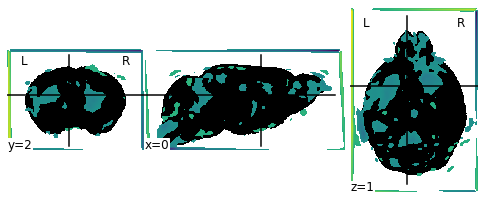

In [88]:
from nilearn import plotting

# plot the OG jacobian
plotting.plot_img(jac, bg_img=mask_file, threshold=0.1)

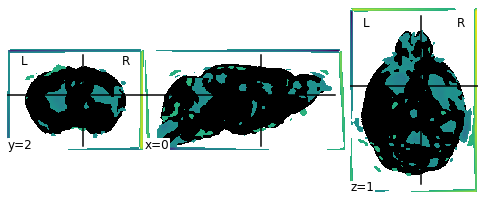

In [89]:
# plot the swapped jacobian. Should be opposite image above
plotting.plot_img(jac_sw_rs, bg_img=mask_file, threshold=0.1)

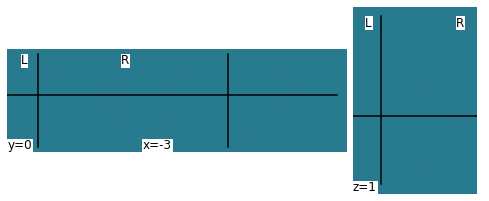

In [90]:
# plot the assymetry image
plotting.plot_img(asym, bg_img=mask_file)